# Preliminaries

The `pandas` library allows the user several data structures for different data manipulation tasks:
1. Data storage through its `Series` and `DataFrame` data structures.
2. Data filtering using multiple methods from the package.
3. Reading data from many different file formats such as `csv`, `txt`, `xlsx`, ...

Below we provide a brief overview of the `pandas` functionalities needed for these exercises. The complete documentation can be found on the [`pandas` website](https://pandas.pydata.org/).

## Pandas data structures

### Series
The Pandas Series data structure is similar to a one-dimensional array. It can store any type of data. The values are mutable but the size not.

To create `Series`, we call the `pd.Series()` method and pass an array. A `Series` may also be created from a numpy array.

In [1]:
import pandas as pd
import numpy as np

first_series = pd.Series([1,10,100,1000])

print(first_series)

teams = np.array(['PSV','Ajax','Feyenoord','Twente'])
second_series = pd.Series(teams)

print('\n')
print(second_series)

0       1
1      10
2     100
3    1000
dtype: int64


0          PSV
1         Ajax
2    Feyenoord
3       Twente
dtype: object


### DataFrame
One can think of a `DataFrame` as a table with rows and columns (2D structure). The columns can be of a different type (as opposed to `numpy` arrays) and the size of the `DataFrame` is mutable.

To create `DataFrame`, we call the `pd.DataFrame()` method and we can create it from scratch or we can convert a numpy array or a list into a `DataFrame`.

In [2]:
# DataFrame from scratch
first_dataframe = pd.DataFrame({
    "Position": [1, 2, 3, 4],
    "Team": ['PSV','Ajax','Feyenoord','Twente'],
    "GF": [80, 75, 75, 70],
    "GA": [30, 25, 40, 60],
    "Points": [79, 78, 70, 66]
})

print("From scratch: \n {} \n".format(first_dataframe))

# DataFrme from a list
data = [[1, 2, 3, 4], ['PSV','Ajax','Feyenoord','Twente'], 
        [80, 75, 75, 70], [30, 25, 40, 60], [79, 78, 70, 66]]
columns = ["Position", "Team", "GF", "GA", "Points"]

second_dataframe = pd.DataFrame(data, index=columns)

print("From list: \n {} \n".format(second_dataframe.T)) # the '.T' operator is explained later on

# DataFrame from numpy array
data = np.array([[1, 2, 3, 4], ['PSV','Ajax','Feyenoord','Twente'], 
                 [80, 75, 75, 70], [30, 25, 40, 60], [79, 78, 70, 66]])
columns = ["Position", "Team", "GF", "GA", "Points"]

third_dataframe = pd.DataFrame(data.T, columns=columns)

print("From numpy array: \n {} \n".format(third_dataframe))

From scratch: 
    Position       Team  GF  GA  Points
0         1        PSV  80  30      79
1         2       Ajax  75  25      78
2         3  Feyenoord  75  40      70
3         4     Twente  70  60      66 

From list: 
   Position       Team  GF  GA Points
0        1        PSV  80  30     79
1        2       Ajax  75  25     78
2        3  Feyenoord  75  40     70
3        4     Twente  70  60     66 

From numpy array: 
   Position       Team  GF  GA Points
0        1        PSV  80  30     79
1        2       Ajax  75  25     78
2        3  Feyenoord  75  40     70
3        4     Twente  70  60     66 



### DataFrame attributes
This section gives a quick overview of some of the `pandas.DataFrame` attributes such as `T`, `index`, `columns`, `iloc`, `loc`, `shape` and `values`.

In [3]:
# transpose the index and columns
print(third_dataframe.T)

            0     1          2       3
Position    1     2          3       4
Team      PSV  Ajax  Feyenoord  Twente
GF         80    75         75      70
GA         30    25         40      60
Points     79    78         70      66


In [4]:
# index makes reference to the row labels
print(third_dataframe.index)

RangeIndex(start=0, stop=4, step=1)


In [5]:
# columns makes reference to the column labels
print(third_dataframe.columns)

Index(['Position', 'Team', 'GF', 'GA', 'Points'], dtype='object')


In [6]:
# iloc allows to access the index by integer-location (e.g. all team names, which are in the second columm)
print(third_dataframe.iloc[:,1])

0          PSV
1         Ajax
2    Feyenoord
3       Twente
Name: Team, dtype: object


In [7]:
# loc allows to access the index by label(s)-location (e.g. all team names, which are in the "Team" columm)
print(third_dataframe.loc[0, 'Team'])

PSV


In [8]:
# shape returns a tuple with the DataFrame dimension, similar to numpy
print(third_dataframe.shape)

(4, 5)


In [9]:
# values return a Numpy representation of the DataFrame data
print(third_dataframe.values)

[['1' 'PSV' '80' '30' '79']
 ['2' 'Ajax' '75' '25' '78']
 ['3' 'Feyenoord' '75' '40' '70']
 ['4' 'Twente' '70' '60' '66']]


### DataFrame methods
This section gives a quick overview of some of the `pandas.DataFrame` methods such as `head`, `describe`, `concat`, `groupby`,`rename`, `filter`, `drop` and `isna`. To import data from CSV or MS Excel files, we can make use of `read_csv` and `read_excel`, respectively.

In [10]:
# print the first few rows in your dataset with head()
print(third_dataframe.head()) # In this case, it is not very useful because we don't have thousands of rows

  Position       Team  GF  GA Points
0        1        PSV  80  30     79
1        2       Ajax  75  25     78
2        3  Feyenoord  75  40     70
3        4     Twente  70  60     66


In [11]:
# get the summary statistics of the DataFrame with describe()
print(third_dataframe.describe())

       Position Team  GF  GA Points
count         4    4   4   4      4
unique        4    4   3   4      4
top           1  PSV  75  30     79
freq          1    1   2   1      1


In [12]:
# concatenate (join) DataFrame objects using concat()

# first, we will split the above DataFrame in two different ones
df_a = third_dataframe.loc[[0,1],:]
df_b = third_dataframe.loc[[2,3],:]

print(df_a)
print('\n')

print(df_b)
print('\n')

# now, we concatenate both datasets
df = pd.concat([df_a, df_b])

print(df)

  Position  Team  GF  GA Points
0        1   PSV  80  30     79
1        2  Ajax  75  25     78


  Position       Team  GF  GA Points
2        3  Feyenoord  75  40     70
3        4     Twente  70  60     66


  Position       Team  GF  GA Points
0        1        PSV  80  30     79
1        2       Ajax  75  25     78
2        3  Feyenoord  75  40     70
3        4     Twente  70  60     66


In [13]:
# group the data by certain variable via groupby()
# here, we have grouped the data by goals for, which in this case is 75

group = df.groupby('GF')

print(group.get_group('75'))

  Position       Team  GF  GA Points
1        2       Ajax  75  25     78
2        3  Feyenoord  75  40     70


In [14]:
# rename() helps you change the column or index names
print(df.rename(columns={'Position':'Pos','Team':'Club'}))

  Pos       Club  GF  GA Points
0   1        PSV  80  30     79
1   2       Ajax  75  25     78
2   3  Feyenoord  75  40     70
3   4     Twente  70  60     66


In [15]:
# build a subset of rows or columns of your dataset according to labels via filter()
# here, items refer to the variable names: 'Team' and 'Points'; to select columns, we specify axis=1
print(df.filter(items=['Team', 'Points'], axis=1))

        Team Points
0        PSV     79
1       Ajax     78
2  Feyenoord     70
3     Twente     66


In [16]:
# dropping some labels
print(df.drop(columns=['GF', 'GA']))

  Position       Team Points
0        1        PSV     79
1        2       Ajax     78
2        3  Feyenoord     70
3        4     Twente     66


In [17]:
# search for NA (not available) entries in the DataFrame
print(df.isna()) # No NA values
print('\n')

# create a pandas Series with a NA value
# the Series as W (winnin matches)
tmp = pd.Series([np.nan, 25, 24, 19],  name="W")

# concatenate the Series with the DataFrame
df = pd.concat([df,tmp], axis = 1)
print(df)
print('\n')

# again, check for NA entries
print(df.isna())

   Position   Team     GF     GA  Points
0     False  False  False  False   False
1     False  False  False  False   False
2     False  False  False  False   False
3     False  False  False  False   False


  Position       Team  GF  GA Points     W
0        1        PSV  80  30     79   NaN
1        2       Ajax  75  25     78  25.0
2        3  Feyenoord  75  40     70  24.0
3        4     Twente  70  60     66  19.0


   Position   Team     GF     GA  Points      W
0     False  False  False  False   False   True
1     False  False  False  False   False  False
2     False  False  False  False   False  False
3     False  False  False  False   False  False


## Dataset

For this week exercises we will use a dataset from the Genomics of Drug Sensitivity in Cancer (GDSC) project (https://www.cancerrxgene.org/). In this study (['Iorio et al., Cell, 2016']()), 265 compounds were tested on 1001 cancer cell lines for which different types of -omics data (RNA expression, DNA methylation, Copy Number Alteration, DNA sequencing) are available. This is a valuable resource to look for biomarkers of drugs sensitivity in order to try to understand why cancer patients responds very differently to cancer drugs and find ways to assign the optimal treatment to each patient.

For this exercise we will use a subset of the data, focusing the response to the drug YM155 (Sepantronium bromide) on four cancer types, for a total of 148 cancer cell lines.

| ID          | Cancer type                      |
|-------------|----------------------------------|
|   COAD/READ | Colorectal adenocarcinoma        |
|   NB        | Neuroblastoma                    |
|   KIRC      | Kidney renal clear cell carcinoma|
|   BRCA      | Breast carcinoma                 |

We will use the RNA expression data (RMA normalised). Only genes with high variability across cell lines (variance > 5, resulting in 238 genes) have been kept.

Drugs have been tested at different concentration, measuring each time the viability of the cells. Drug sensitivity is measured using the natural log of the fitted IC50 metric, which is defined as the half maximal inhibitory concentration. A lower IC50 corresponds to a more sensitive cell line because a lower amount of drug is sufficient to have a strong response, while a higher IC50 corresponds to a more resistant cell line because more drug is needed for killing the cells.

Based on the IC50 metric, cells can be classified as sensitive or resistant. The classification is done by computing the $z$-score across all cell lines in the GDSC for each drug, and considering as sensitive the ones with $z$-score < 0 and resistant the ones with $z$-score > 0.

The dataset is originally provided as 3 files ([original source](https://www.sciencedirect.com/science/article/pii/S0092867416307462?via%3Dihub)) :

`GDSC_RNA_expression.csv`: gene expression matrix with the cell lines in the rows (148) and the genes in the columns (238).

`GDSC_drug_response.csv`: vector with the cell lines response to the drug YM155 in terms of log(IC50) and as classification in sensitive or resistant.

`GDSC_metadata.csv`: metadata for the 148 cell lines including name, COSMIC ID and tumor type (using the classification from ['The Cancer Genome Atlas TCGA'](https://www.cancer.gov/about-nci/organization/ccg/research/structural-genomics/tcga))

For convenience, we provide the data already curated.

`RNA_expression_curated.csv`: [148 cell lines , 238 genes]

`drug_response_curated.csv`: [148 cell lines , YM155 drug]

The curated data cam be read as `pandas` `DataFrame`s in the following way:

In [18]:
import pandas as pd

gene_expression = pd.read_csv("./data/RNA_expression_curated.csv", sep=',', header=0, index_col=0)
drug_response = pd.read_csv("./data/drug_response_curated.csv", sep=',', header=0, index_col=0)

You can use the `DataFrame`s directly as inputs to the the `sklearn` models. The advantage over using `numpy` arrays is that the variable are annotated, i.e. each input and output has a name.

## Tools
The `scikit-learn` library provides the required tools for linear regression/classification and shrinkage, as well as for logistic regression.

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression

Note that the notation used for the hyperparameters in the `scikit-learn` library is different from the one used in the lecture. More specifically, in the lecture $\alpha$ is the tunable parameter to select the compromise between Ridge and Lasso. Whereas, `scikit-learn` library refers to `alpha` as the tunable parameter $\lambda$. Please check the documentation for more details.

# Exercises

## Selection of the hyperparameter

Implement cross-validation (using `sklearn.grid_search.GridSearchCV`) to select the `alpha` hyperparameter of `sklearn.linear_model.Lasso`. 

In [20]:
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

# define the parameters to be tested
parameters = {'alpha': np.linspace(0.1, 1.0, 10)}

#define the model
lasso = linear_model.Lasso(random_state= 40)

# define the grid search and fit the model on the data
clf = GridSearchCV(lasso, parameters, cv=5)
clf.fit(gene_expression, drug_response)

print("Best parameter value: ", clf.best_params_)
print("Best score: ", clf.best_score_)

Best parameter value:  {'alpha': 0.7000000000000001}
Best score:  0.3154185777006199


#### Explanation of the code

The code uses `GridSearchCV` to find the optimal value for the alpha hyperparameter of the Lasso model, generated by the `linear_model.Lasso` function. The model is trained and tested using the RNA expression data (`gene_expression`) as input features and the drug response (`drug_response`) as the target values.

The hyperparameter `alpha` controls the regularization strength in the Lasso model, with higher values leading to sparser models by applying greater penalty to the coefficients. To select the best hyperparameter of `alpha`, `GridSearchCV`compares the default scoring method for Lasso, which is $R^2$ (coefficient of determination), for the different possible values.

According to the results of `GridSearchCV`, out of the 10 hyperparameter values of alpha in the interval [0.1-1.0], $\alpha$ = 0.7 resulted in the best $R^2$ score of 0.3154. The selected value of $\alpha$ represents a balance between underfitting and overfitting for the given dataset. The $R^2$ score measures how well the model captures the variance in the response variable, with higher values being better.

## Feature selection

Look at the features selected using the hyperparameter which corresponds to the minimum cross-validation error.

<p><font color='#770a0a'>Is the partition in training and validation sets playing a role in the selection of the hyperparameter? How will this affect the selection of the relevant features?</font></p>

<p><font color='#770a0a'>Should the value of the intercept also be shrunk to zero with Lasso and Ridge regression? Motivate your answer.</font></p>


In [21]:
# Show features that are selected using the hyperparameter which corresponds to the minimum cross-validation error

# Retrieve best estimator from the gridsearch performed earlier
best_lasso = clf.best_estimator_

# Select the features where the coefficients are not 0
selected_features = gene_expression.columns[best_lasso.coef_ != 0]

# Display these features
print("Selected features:", selected_features)

Selected features: Index(['GAL', 'ABCB1', 'TSPAN8', 'SELENBP1', 'TFF3', 'FABP1', 'FBP1',
       'TACSTD2', 'AKR1C3'],
      dtype='object')


#### Results & Discussion

**Is the partition in training and validation sets playing a role in the selection of the hyperparameter?**

Yes, the partitioning of the data into training and validation sets does influence the selection of the hyperparameter. In cross-validation, the model is evaluated on different subsets of the data. This helps ensure that the selected hyperparameter generalizes well and is not overly tuned to a specific subset of the data. Cross-validation provides an average estimate, mitigating the effect of potential outliers or anomalies in any one split. If the partitioning was not considered (for example by using a single train-test split), the selected $\alpha$ might be overly specific to that single split and not generalizable. 

Since different training/validation partitions expose the model to different aspects of the data, the choice of $\alpha$ might slightly vary across splits. This variance could influence the set of features selected by the Lasso model, especially if some features are borderline important. 

**How will this affect the selection of the relevant features?**

The relevant features selected by the Lasso model depend on the value of $\alpha$. If the $\alpha$ is too large, too many features will be shrunk to zero, possibly eliminating important features. If it’s too small, too many features might be retained, leading to a less interpretable model. Cross-validation ensures that the chosen $\alpha$ provides a good balance between feature selection (sparsity) and predictive accuracy. 

In real-world scenarios, it is crucial for feature selection to be consistent across different runs, especially if these features are used for further biological interpretation. A stable feature set means more confidence in their biological relevance, whereas inconsistency might indicate that some features are not as robust in predicting the response. Variability in partitioning can lead to slight differences in selected features, but the cross-validation procedure minimizes this risk by averaging over different splits.

**Should the value of the intercept also be shrunk to zero with Lasso and Ridge regression?**

No, the intercept should not be regularized in Lasso and Ridge regression. The intercept represents the baseline prediction (average outcome when all feature values are zero). Regularizing the intercept would mean penalizing the model’s baseline prediction, which is usually not desirable. Instead, the focus of regularization should be on the feature coefficients to control overfitting and improve generalization. Mathematically, the intercept is excluded from the penalty term in the objective function to ensure that it accurately represents the mean of the target variable without being unnecessarily shrunk.

## Bias-variance 

Show the effect of the regularization on the parameter estimates in terms of bias and variance. For this you can repeat the optimization 100 times using bootstrap and visualise the profile of the Lasso regression coefficient over a grid of the hyperparameter, optionally including the variability as error bars.

<p><font color='#770a0a'>Based on the visual analysis of the plot, what are your observation on bias and variance in relation to model complexity? Motivate your answer.</font></p>

c:\Users\tac70\anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.324e-01, tolerance: 1.313e-01
  model = cd_fast.enet_coordinate_descent(


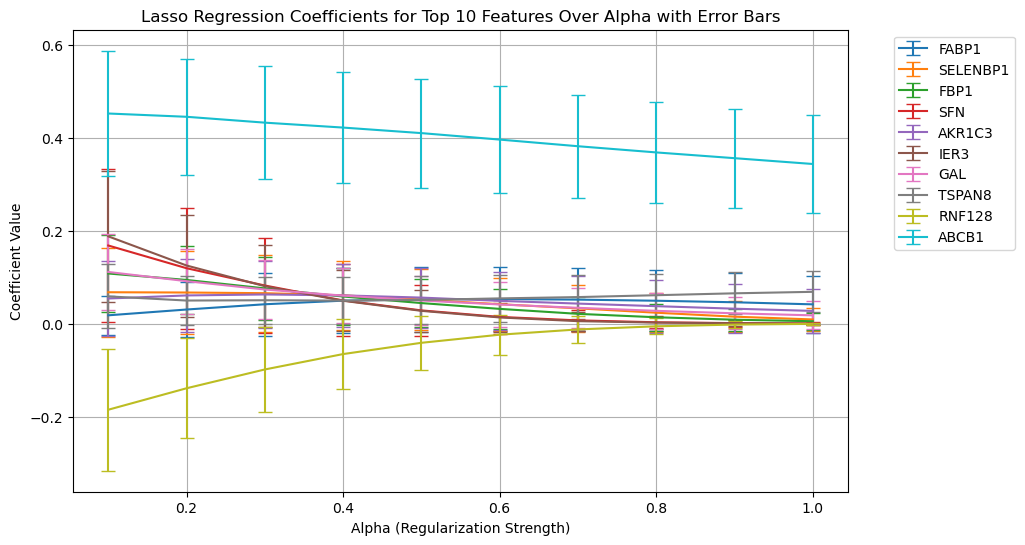

In [22]:
import sys
sys.path.append('code/')

from bias_variance_analysis import *

# Define alpha values
alpha_values = np.linspace(0.1, 1.0, 10)

# Call the bias and variance analysis function
bias_variance_analysis(gene_expression, drug_response, alpha_values, n_bootstrap=100, top_n_features=10)


#### Explanation of Code

In this task, we aimed to explore how regularization affects Lasso regression coefficients, focusing on the bias-variance trade-off. To do this, we used bootstrap resampling and fit the Lasso model multiple times for a range of regularization values $\alpha$.

We began by defining 100 bootstrap samples and a grid `alpha_values` (from 0.1 to 1.0) to represent different levels of regularization. Bootstrap resampling was used to create multiple subsets of the data with replacement, which helps to estimate the variability of the Lasso coefficients. For each bootstrap sample, we resampled the gene expression data and the drug response data, and for each resampled dataset, we fit the Lasso model for every `alpha`. We then stored the coefficients for all bootstrap iterations and `alpha` values in a 3D array.

Once we gathered the coefficients, we calculated the mean and standard deviation of the coefficients across the bootstrap samples. The mean gave us the expected value of the coefficients for each feature, while the standard deviation helped us understand the variance in the coefficients due to the resampling process.

Finally, we plotted the coefficients for these top 10 features as a function of `alpha`. For each feature, we plotted the mean coefficient values for different `alpha` values, along with error bars that represent the standard deviation of the coefficients across the bootstrap samples. The error bars gave us an indication of the variance in the coefficients due to the variability in the resampled datasets.

#### Results & Discussion

Based on the visual analysis of the plot, we can make several observations about bias and variance in relation to model complexity, which is controlled by the regularization parameter $\alpha$

##### **Observations on Bias:**
1. **Low $\alpha$ (left side of the plot, less regularization):**
   - Many of the coefficients have relatively high values, which indicates that the model is capturing more complexity from the data.
   - The larger coefficient values suggest that the model has **low bias** because it is able to fit the training data closely, allowing most features to have some impact.
   
2. **High $\alpha$ (right side of the plot, more regularization):**
   - As $\alpha$ increases, the coefficients shrink, with many approaching zero. This suggests that the model is simplifying, leading to **higher bias**.
   - The increased bias is a result of the Lasso regularization forcing some coefficients to reduce or even eliminate features that have smaller effects, thereby constraining the model’s flexibility.

##### **Observations on Variance:**
1. **Low $\alpha$ (less regularization):**
   - The **error bars** (which represent the standard deviation of the coefficients across bootstrap samples) are relatively large for some features in our plot.
   - Larger error bars indicate that the model has **higher variance** in this regime, as it is more sensitive to variations in the data, leading to greater instability in the coefficients. This is typical in models with high complexity that tend to overfit to noise in the data.

2. **High $\alpha$ (more regularization):**
   - As $\alpha$ increases, the **error bars** shrink for most features, indicating **lower variance**. This suggests that the model becomes more stable as the regularization strength increases, making it less sensitive to the specific characteristics of each bootstrap sample.
   - The reduced variance reflects the model’s tendency to avoid overfitting, as it simplifies and relies on fewer, more important features.

##### **Trade-off Between Bias and Variance:**
- **Low $\alpha$**: The model is **complex**, leading to **low bias** (better fit to training data) but **high variance** (sensitivity to data fluctuations and noise).
- **High $\alpha$**: The model becomes **simpler**, resulting in **high bias** (greater restriction on feature importance) but **low variance** (more stability across different data samples).

The goal is to minimize both the bias and variance to achieve the best predictive performance, which often involves finding the point where further increases in $\alpha$ do not significantly improve stability but do start to degrade model accuracy.
Practically, a smaller set of non-zero coefficients also contributes to better interpretability, especially when identifying which genes are the most predictive of drug response.

##### **Conclusion:**
The plot clearly shows the **bias-variance trade-off** in Lasso regression. Increasing the regularization strength $\alpha$ introduces more bias but reduces variance, while decreasing $\alpha$ reduces bias but increases variance. The optimal $\alpha$ would be one that strikes a balance, preventing both underfitting (too high bias) and overfitting (too high variance).


## Logistic regression

<p><font color='#770a0a'>Write the expression of the objective function for the penalized logistic regression with $L_1$ and $L_2$ regularisation (as in Elastic net).</font></p>

The unregularized Log-likelihood function for logistic regression is the following:

$$\ell(\beta) = \sum_{i=1}^{N} \left\{ y_i \beta^T x_i - \log(1 + e^{\beta^T x_i}) \right\}$$

The goal is to maximize this log-likelihood with respect to $\beta$. Regularization adds a penalty to this likelihood to prevent overfitting.

The Lasso penalty adds the $\ell_1$-norm of the coefficients vector $\beta$ (sum of the absolute values) to the negative log-likelihood:

$$\mathcal{L}(\beta) = -\ell(\beta) + \lambda \sum_{j=1}^{p} |\beta_j|$$


This results in the following objective function to minimize:

$$\mathcal{L}(\beta) = -\sum_{i=1}^{N} \left\{ y_i \left(\beta_0+ \beta^T x_i \right) - \log(1 + e^{\left(\beta_0+ \beta^T x_i \right)}) \right\} + \lambda \sum_{j=1}^{p} |\beta_j|$$

Alternatively, it can be seen as a maximization with the following objective function:

$$\mathcal{L}(\beta) = \sum_{i=1}^{N} \left\{ y_i \left(\beta_0+ \beta^T x_i \right) - \log(1 + e^{\left(\beta_0+ \beta^T x_i \right)}) \right\} - \lambda \sum_{j=1}^{p} |\beta_j|$$

The ridge penalty adds the $\ell_2$-norm of the coefficients vector $\beta$ (sum of squares) to the negative log-likelihood. The objective function to maximize is:

$$\mathcal{L}(\beta) = \sum_{i=1}^{N} \left\{ y_i \left(\beta_0+ \beta^T x_i \right) - \log(1 + e^{\left(\beta_0+ \beta^T x_i \right)}) \right\} - \lambda \sum_{j=1}^{p} \beta_j^2$$


The Elastic Net regularization is a combination of both Lasso (L1) and Ridge (L2) penalties. It aims to balance the benefits of both regularization methods: the feature selection ability of Lasso and the stability of Ridge. The Elastic Net penalty is controlled by two hyperparameters: $\lambda_1$ and $\lambda_2$, which determine the contribution of the L1 and L2 penalties, respectively.

Substituting the log-likelihood expression from logistic regression, the complete objective function (for maximization) for Elastic Net regularized logistic regression becomes:

$$\mathcal{L}(\beta) = \sum_{i=1}^{N} \left\{ y_i \left(\beta_0+ \beta^T x_i \right) - \log(1 + e^{\left(\beta_0+ \beta^T x_i \right)}) \right\} - \lambda_1 \sum_{j=1}^{p} |\beta_j| - \lambda_2 \sum_{j=1}^{p} \beta_j^2$$

The expression for the Elastic Net regularization is often expressed using a single regularization parameter $\lambda$ and a mixing parameter $\alpha$, where $\alpha \in [0,1]$ controls the balance between L1 and L2 penalties. When $\alpha = 1$, the regularization is purely Ridge; when $\alpha= 0$, the regularization is purely Lasso; when $0\lt\alpha\lt1$, the result is a blend of Lasso and Ridge penalties. The objective function to maximize is:

$$\mathcal{L}(\beta) = \sum_{i=1}^{N} \left\{ y_i \left(\beta_0+ \beta^T x_i \right) - \log(1 + e^{\left(\beta_0+ \beta^T x_i \right)}) \right\} - \lambda \left(  \sum_{j=1}^{p} \left( \alpha\beta_j^2  + (1 - \alpha)|\beta_j| \right) \right) $$


